In [1413]:
import networkx as nx
import random

nodes_number = 100
Q = nx.Graph()

for i in range(nodes_number):
    for j in range(nodes_number):
        if i != j:
            p = random.random()
            Q.add_edge(i, j, weight=p)

In [1414]:
p = random.random()
p = 0.98

In [1415]:
i = -1
removed = 1

for edge in Q.edges:
    if  Q[edge[0]][edge[1]]['weight'] < p:
        #print(f'Removed edge ({edge[0]}, {edge[1]})')
        Q.remove_edge(edge[0], edge[1])
        removed = removed + 1
    continue

x = []
for node in Q.nodes:
    if nx.degree(Q)[node] == 0:
        x.append(node)

Q.remove_nodes_from(x)

while removed > 0:
    i = i + 1
    removed = 0
    for edge in Q.edges:
        k_list = [value for (node_id, value) in nx.degree(Q)]
        k_mean = sum(k_list) / nx.number_of_nodes(Q)
        if k_mean > nx.degree(Q)[edge[0]] or k_mean > nx.degree(Q)[edge[1]]:
            #print(f'Removed edge ({edge[0]}, {edge[1]})')
            Q.remove_edge(edge[0], edge[1])
            removed = removed + 1
    print(removed)

print(i)

44
5
0
2


In [1416]:
x = []
for node in Q.nodes:
    if nx.degree(Q)[node] == 0:
        x.append(node)

Q.remove_nodes_from(x)

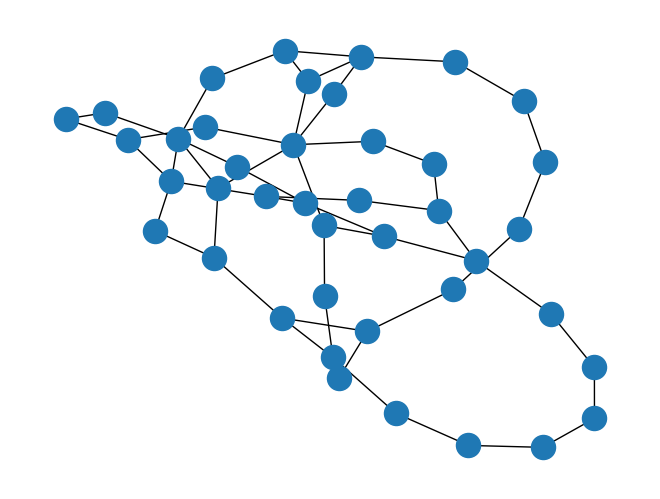

In [1417]:
nx.draw(Q)

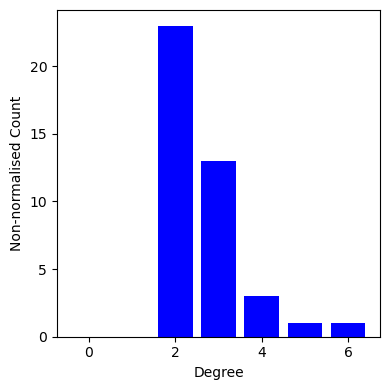

In [1418]:
# Create the degree distribution

# Returns a list of the number of nodes "h(k)" with a certain degree "k"
h_deg = nx.degree_histogram(Q)

# Creates a list of degree values (from 0 to the size of h_deg) for plotting
v_deg = list( range(0, len(h_deg)) )

# Plot the degree distribution

import matplotlib.pyplot as plt

#%matplotlib inline

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('Non-normalised Count')
plt.xlabel('Degree')

# draw a bar plot/histogram
plt.bar(v_deg, h_deg, width = 0.8, color = 'b')  

# If you use log axes (for skewed distributions), it is better to plot dots instead
#plt.plot(v_deg, h_deg, 'b+')                     # or 'k+' 

plt.show()

In [1419]:
# Highest degree
sorted(Q.degree, key=lambda x: x[1], reverse=True)[0][1]

6

original no. nodes:  100
no. nodes:  41
no. edges:  54
avg. degree: 2.6341


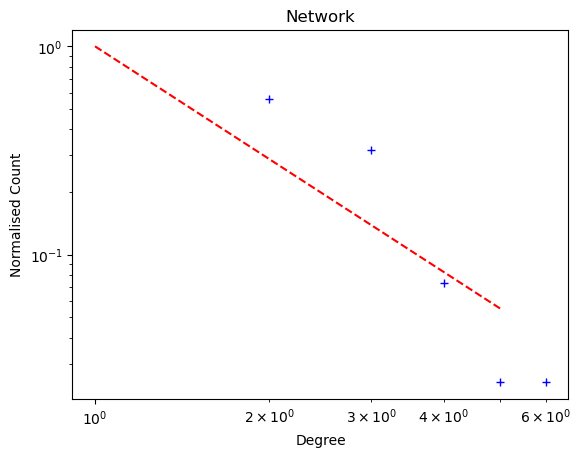

In [1420]:
# Solution

# the email network is small (relatively few nodes)
# collaboration is a bit larger
# phone calls is a bit larger
# citation is large
# actors is very large

import networkx as nx
import matplotlib.pyplot as plt

# print network size
N = nx.number_of_nodes(Q)
E = nx.number_of_edges(Q)
print('original no. nodes: ', nodes_number)
print('no. nodes: ', N)
print('no. edges: ', E)

# calculate the average degree
k_list = [val for (node, val) in nx.degree(Q)]  # make a list "k_list" of degrees for all nodes
print('avg. degree: %.4f'% (sum(k_list)/N) )    # calculate the average degree of the network

# Make the histogram of degree, i.e. the number of nodes with a certain degree
h_deg = nx.degree_histogram(Q)       # calculate the degree histogram
h_deg_n = [x / N for x in h_deg]     # normalise the histogram to make a pdf
v_deg = list( range(0,len(h_deg) ))  # create a list of degree values, from 0 to len(h_deg)

# Draw the histogram, using log-scale on the axes (why? try without log-scale)
plt.title('Network')
plt.ylabel('Normalised Count')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')
#plt.bar(v_deg, h_deg_n, width=0.8, color='b')  # this plot using "bars", but "bars" are not good when using log-scale in the axes - DO NOT USE IT UNLESS THE HISTOGRAM IS SMALL!
plt.plot(v_deg, h_deg_n, 'b+')

# Draw an eye-guide curve. In this case a power-law with exponent 1.8
list_x = list( range(1,sorted(Q.degree, key=lambda x: x[1], reverse=True)[0][1]) )                    # Create the values for the x-axis and convert to a list
list_y = list( [ 1/(i**1.8) for i in list_x ] )   # Create the values for the y-axis and convert to a list:
                                                  # this code is called "list comprehension" [ 1/(i**1.8) for i in list_x ] -> for each item "i" in the list "list_x", the output is "1/(i**1.8)"
plt.plot(list_x, list_y, 'r--')

plt.show()